In [35]:
import benchmax.evaluation as ev
import pandas
import matplotlib


stats_qfnra = pandas.read_csv('stats_solvers-qfnra_24-01-12_09:30.csv', header=[0,1], index_col=0)
stats_qfnra = stats_qfnra.join(pandas.read_csv('stats_smtrat-qfnra_24-01-03_12:03.csv', header=[0,1], index_col=0))

stats_qfnra_covering = pandas.read_csv('stats_smtrat_24-01-03_10:40.csv', header=[0,1], index_col=0).loc[:,"smtrat-CoveringNG_PPDefault-development"]
stats_qfnra_covering.columns=pandas.MultiIndex.from_product([['smtrat-CoveringNG_PPDefault-development'], stats_qfnra_covering.columns])
stats_qfnra = stats_qfnra.join(stats_qfnra_covering)

stats_qfnra = stats_qfnra.join(pandas.read_csv('stats_analyzer-qfnra_24-01-09_12:59.csv', header=[0,1], index_col=0))

stats_nra = pandas.read_csv('stats_solvers-nra_24-01-12_08:34.csv', header=[0,1], index_col=0)
stats_nra = stats_nra.join(pandas.read_csv('stats_smtrat-nra_24-01-03_16:24.csv', header=[0,1], index_col=0))

def transform_to_seconds(df):
    for solver in ev.get_solvers(df):
        df[(solver,'runtime')] /= 1000

transform_to_seconds(stats_nra)
transform_to_seconds(stats_qfnra)


linestyles = ['-','--',':','-.',(5, (10, 3)),(0, (5, 10)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1))]
colors_blind = ['#332288', '#117733', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255', '#44AA99']
colors_rwth = ['#00549F','#E30066', '#57AB27', '#006165', '#CC071E', '#F6A800', '#0098A1', '#A11035', '#57AB27', '#612158' , '#FFED00', '#BDCD00']
matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler('color', colors_rwth[0:11]) + matplotlib.cycler('linestyle',linestyles[0:11])

/tmp/ipykernel_17604/1819146064.py:9: DtypeWarning: Columns (272,273,274,275,276,277,278,280,467,468,469,470,471,472,473,475,1445,1640) have mixed types. Specify dtype option on import or set low_memory=False.
  stats_qfnra_covering = pandas.read_csv('stats_smtrat_24-01-03_10:40.csv', header=[0,1], index_col=0).loc[:,"smtrat-CoveringNG_PPDefault-development"]


# QFNRA

## General

In [36]:
ev.inspect_answer(stats_qfnra)

z3-4.12.4/build/z3  cvc5/cvc5  yices2-wrapper.sh  \
count                            12134      12134              12134   
sat                               5561       5331               5314   
unsat                             5338       5670               5509   
unknown                              0          0                  0   
wrong                                0          0                  0   
error                                0          0                  0   
timeout                           1022       1133               1311   
memout                               0          0                  0   
no answer                            0          0                  0   
segmentation fault                   0          0                  0   
segfault                             0          0                  0   
abort                                0          0                  0   
invalid                            213          0                  0   
solved                           10899      11001              10823   

                    smtrat-Default-development  \
count                                    12134   
sat                                       5200   
unsat                                     5111   
unknown                                      0   
wrong                                        0   
error                                        0   
timeout                                   1474   
memout                                     349   
no answer                                    0   
segmentation fault                           0   
segfault                                     0   
abort                                        0   
invalid                                      0   
solved                                   10311   

                    smtrat-MCSAT_PPOCNew-development  \
count                                          12134   
sat                                             5146   
unsat                                           5060   
unknown                                            0   
wrong                                              0   
error                                              0   
timeout                                         1580   
memout                                           348   
no answer                                          0   
segmentation fault                                 0   
segfault                                           0   
abort                                              0   
invalid                                            0   
solved                                         10206   

                    smtrat-CoveringNG_PPDefault-development  analyzer  
count                                                 12134     12134  
sat                                                    5184     12131  
unsat                                                  5048         0  
unknown                                                   0         0  
wrong                                                     0         0  
error                                                     0         0  
timeout                                                1454         3  
memout                                                  445         0  
no answer                                                 0         0  
segmentation fault                                        0         0  
segfault                                                  3         0  
abort                                                     0         0  
invalid                                                   0         0  
solved                                                10232     12131

In [37]:
def solved_by_class(df, solvers):
    df = df.loc[:,[(s,'answer') for s in solvers]]
    df = df.droplevel(1,1)
    df = df.replace({'sat': 1, 'unsat': 1, 'unknown': 0,'wrong': 0,'error': 0,'timeout': 0,'memout': 0,'no answer': 0,'segmentation fault': 0,'segfault': 0,'abort': 0,'invalid': 0})
    df['total']=1
    df = df.groupby(df.index.to_series().str.split("/").str[0]).sum()
    return df

solved_by_class(stats_qfnra, ['z3-4.12.4/build/z3', 'cvc5/cvc5', 'yices2-wrapper.sh',
       'smtrat-Default-development',
       'smtrat-MCSAT_PPOCNew-development',
       'smtrat-CoveringNG_PPDefault-development'])

z3-4.12.4/build/z3  cvc5/cvc5  \
20161105-Sturm-MBO                                           120        285   
20161105-Sturm-MGC                                             9          0   
20170501-Heizmann-UltimateInvariantSynthesis                   1          3   
20180501-Economics-Mulligan                                  132        125   
2019-ezsmt                                                    57         34   
20200911-Pine                                                240        204   
20211101-Geogebra                                            109         91   
20220314-Uncu                                                224        201   
LassoRanker                                                  282        584   
UltimateAutomizer                                             54         41   
hong                                                           9         20   
hycomp                                                      2551       2399   
kissing                                                       29         16   
meti-tarski                                                 6996       6908   
zankl                                                         86         90   

                                              yices2-wrapper.sh  \
20161105-Sturm-MBO                                          285   
20161105-Sturm-MGC                                            0   
20170501-Heizmann-UltimateInvariantSynthesis                  9   
20180501-Economics-Mulligan                                 128   
2019-ezsmt                                                   47   
20200911-Pine                                               242   
20211101-Geogebra                                            97   
20220314-Uncu                                               220   
LassoRanker                                                 265   
UltimateAutomizer                                            50   
hong                                                         20   
hycomp                                                     2408   
kissing                                                      10   
meti-tarski                                                6952   
zankl                                                        90   

                                              smtrat-Default-development  \
20161105-Sturm-MBO                                                   163   
20161105-Sturm-MGC                                                     9   
20170501-Heizmann-UltimateInvariantSynthesis                           8   
20180501-Economics-Mulligan                                          128   
2019-ezsmt                                                            15   
20200911-Pine                                                        223   
20211101-Geogebra                                                    102   
20220314-Uncu                                                        207   
LassoRanker                                                           32   
UltimateAutomizer                                                     42   
hong                                                                  20   
hycomp                                                              2384   
kissing                                                               19   
meti-tarski                                                         6859   
zankl                                                                100   

                                              smtrat-MCSAT_PPOCNew-development  \
20161105-Sturm-MBO                                                         163   
20161105-Sturm-MGC                                                           0   
20170501-Heizmann-UltimateInvariantSynthesis                                12   
20180501-Economics-Mulligan                                                123   
2019-ezsmt                                                                  12   

Text(0, 0.5, 'running time (s)')

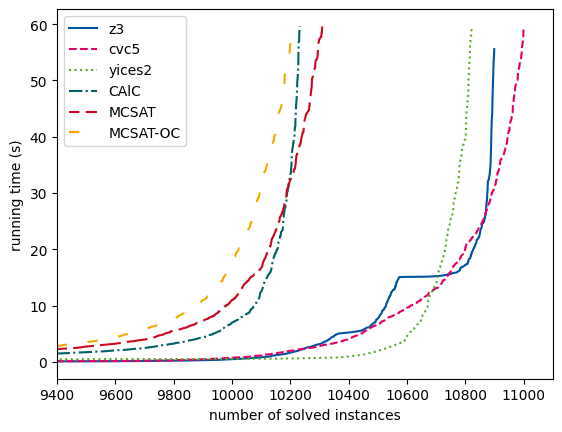

In [38]:
plot = ev.performance_profile(stats_qfnra,['z3-4.12.4/build/z3', 'cvc5/cvc5', 'yices2-wrapper.sh', 'smtrat-CoveringNG_PPDefault-development', 'smtrat-Default-development', 'smtrat-MCSAT_PPOCNew-development'])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.axes.legend(['z3', 'cvc5', 'yices2', 'CAlC', 'MCSAT', 'MCSAT-OC'])
plot.set_xlim(9400,11100)
plot.set_ylabel('running time (s)')

## MCSAT

In [39]:
print(stats_qfnra[stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].loc[:,('analyzer', 'analyzer_num_clauses')].fillna(0).mean())
print(stats_qfnra[~stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].loc[:,('analyzer', 'analyzer_num_clauses')].fillna(0).mean())
print(stats_qfnra[stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & ~stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].loc[:,('analyzer', 'analyzer_num_clauses')].fillna(0).mean())

376.69130347459327
1635.233870967742
319.978102189781


In [40]:
print(stats_qfnra[stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].loc[:,('analyzer', 'analyzer_constraint_deg_max')].fillna(0).mean())
print(stats_qfnra[stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & ~stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].loc[:,('analyzer', 'analyzer_constraint_deg_max')].fillna(0).mean())
print(stats_qfnra[~stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].loc[:,('analyzer', 'analyzer_constraint_deg_max')].fillna(0).mean())

5.704759991966259
8.16058394160584
2.7580645161290325


In [41]:
print(stats_qfnra[stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].shape[0])
print(stats_qfnra[stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & ~stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].shape[0])
print(stats_qfnra[~stats_qfnra[('smtrat-CoveringNG_PPDefault-development', 'answer')].isin(['sat','unsat']) & stats_qfnra[('smtrat-MCSAT_PPOCNew-development', 'answer')].isin(['sat','unsat'])].shape[0])

9958
274
248


# NRA

In [42]:
ev.inspect_answer(stats_nra)

z3-4.12.4/build/z3  cvc5/cvc5  yicesQS-wrapper.sh  \
count                             3819       3819                3819   
sat                                  3          3                   4   
unsat                             3806       3801                3806   
unknown                              0          0                   0   
wrong                                0          0                   0   
error                                0          0                   0   
timeout                              9         15                   9   
memout                               0          0                   0   
no answer                            0          0                   0   
segmentation fault                   0          0                   0   
segfault                             0          0                   0   
abort                                0          0                   0   
invalid                              1          0                   0   
solved                            3809       3804                3810   

                    smtrat-CoveringNG_Default-development  \
count                                                3819   
sat                                                     3   
unsat                                                3811   
unknown                                                 0   
wrong                                                   0   
error                                                   0   
timeout                                                 5   
memout                                                  0   
no answer                                               0   
segmentation fault                                      0   
segfault                                                0   
abort                                                   0   
invalid                                                 0   
solved                                               3814   

                    smtrat-Default-development  
count                                     3819  
sat                                          4  
unsat                                     3811  
unknown                                      0  
wrong                                        0  
error                                        0  
timeout                                      4  
memout                                       0  
no answer                                    0  
segmentation fault                           0  
segfault                                     0  
abort                                        0  
invalid                                      0  
solved                                    3815

In [43]:
stats_nra_shifted = stats_nra.copy()
stats_nra_shifted[('yicesQS-wrapper.sh','runtime')]-=1.230

Text(0, 0.5, 'running time (s)')

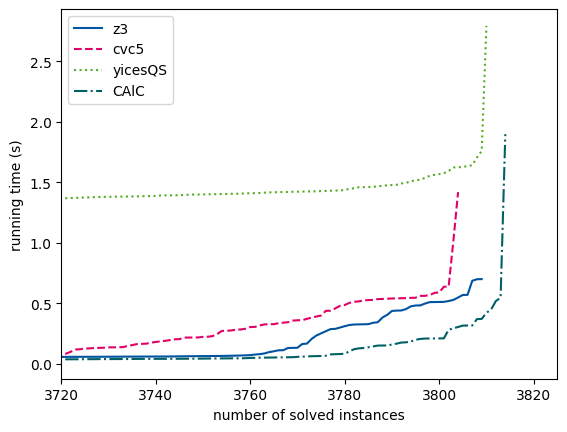

In [44]:
plot = ev.performance_profile(stats_nra_shifted,['z3-4.12.4/build/z3', 'cvc5/cvc5', 'yicesQS-wrapper.sh',
       'smtrat-CoveringNG_Default-development'])
plot.axes.legend(['z3', 'cvc5', 'yicesQS',
       'CAlC'])
plot.set_xlim(3720,3825)
plot.set_ylabel('running time (s)')